In [1]:
using Printf
using Distributions
using StatsPlots
default(fmt=:png, titlefontsize=10)
safediv(x, y) = x == 0 ? zero(x/y) : x/y

function pvalue_binomial_wilson(k, n, p)
    phat, se = k/n, √(p * (1 - p) / n)
    z = safediv(phat - p, se)
    2ccdf(Normal(), abs(z))
end

function confint_binomia_wilson(k, n, α=0.05)
    phat, z = k/n, quantile(Normal(), 1-α/2)
    a, b, c = 1+z^2/n, phat+z^2/(2n), phat^2
    sqrtD = √(b^2 - a*c)
    [(b - sqrtD)/a, (b + sqrtD)/a]
end

r2(x) = @sprintf "%.2g" x

function plot_binomial_test(; k=19, n=50, α=0.05, p0=0.5, p1=0.6, plotCI=true)
    plot(p -> pvalue_binomial_wilson(k, n, p), 0, 1; label="P-value function")
    c = 2
    p = p0
    Pval = pvalue_binomial_wilson(k, n, p)
    vline!([p]; label="", ls=:dot, c)
    scatter!([p], [Pval]; label="P-value($p) = $(r2(Pval))", msc=:auto, c)
    c = 3
    p = p1
    Pval = pvalue_binomial_wilson(k, n, p)
    vline!([p]; label="", ls=:dot, c)
    scatter!([p], [Pval]; label="P-value($p) = $(r2(Pval))", msc=:auto, c)
    c = :blue
    phat = k/n
    vline!([phat]; label="point estimate = $(r2(phat))", msc=:auto, c)
    plotCI && begin
        c = :red
        hline!([α]; label="α = $(100α)%", ls=:dot, c)
        L, U = confint_binomia_wilson(k, n, α)
        plot!([L, U], fill(α, 2); label="$(100(1-α))% CI = [$(r2(L)), $(r2(U))]", lw=3, c)
    end
    plot!(xtick=0:0.05:1, ytick=0:0.05:1, xrotation=45)
    plot!(xguide="p", yguide="P-value")
    title!("P-value function for data k=$k, n=$n
        (model: normal approximation of binomial distribution)")
end

plot_binomial_test (generic function with 1 method)

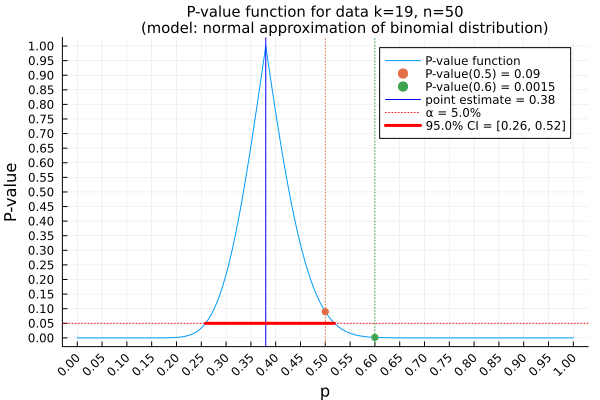

In [2]:
plot_binomial_test(; k=19, n=50, α=0.05, p0=0.5, p1=0.6)

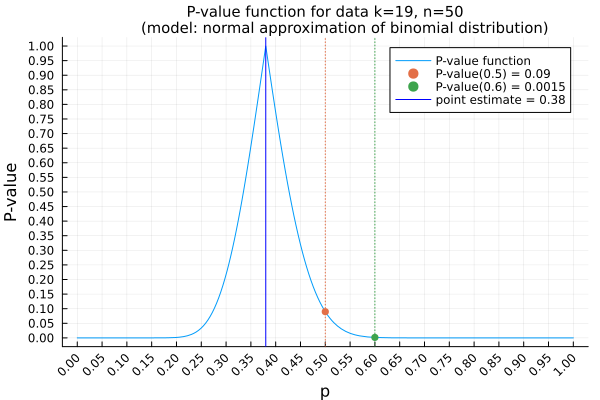

In [3]:
plot_binomial_test(; k=19, n=50, α=0.05, p0=0.5, p1=0.6, plotCI=false)

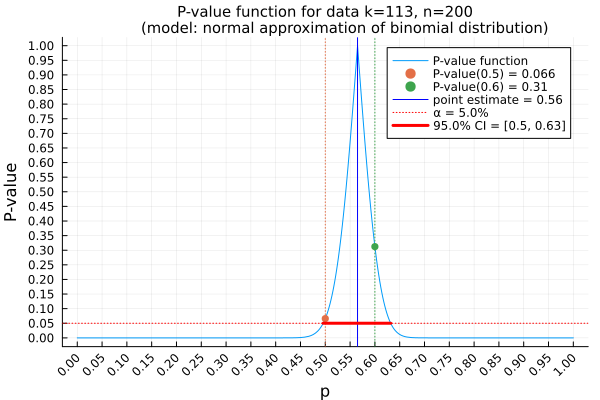

In [4]:
plot_binomial_test(; k=113, n=200, α=0.05, p0=0.5, p1=0.6)

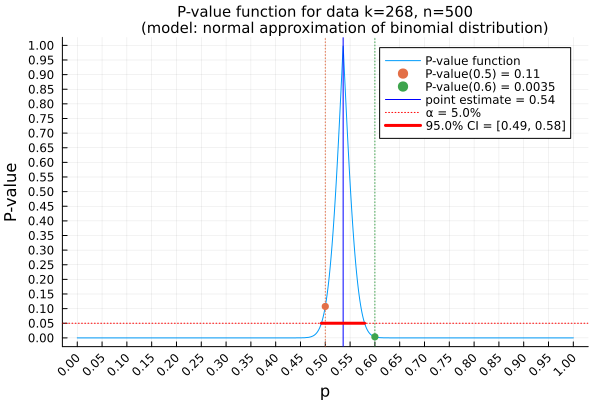

In [5]:
plot_binomial_test(; k=268, n=500, α=0.05, p0=0.5, p1=0.6)